### 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [107]:
# load dataset
bike_sharing = pd.read_csv('~/Desktop/aiffel/subquests/bike-sharing-demand/train.csv')
print(bike_sharing.shape)
bike_sharing.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [108]:
print(bike_sharing.dtypes)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [109]:
# convert datetime column to datetime type and extract year, month, day, hour, minute, second
# to generate new 6 columns

bike_sharing['datetime'] = pd.to_datetime(bike_sharing['datetime'])

bike_sharing['year'] = bike_sharing['datetime'].dt.year
bike_sharing['month'] = bike_sharing['datetime'].dt.month
bike_sharing['day'] = bike_sharing['datetime'].dt.day
bike_sharing['hour'] = bike_sharing['datetime'].dt.hour
bike_sharing['minute'] = bike_sharing['datetime'].dt.minute
bike_sharing['second'] = bike_sharing['datetime'].dt.second

print(bike_sharing.dtypes)
bike_sharing.head()

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
second                 int64
dtype: object


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


<Axes: xlabel='second', ylabel='count'>

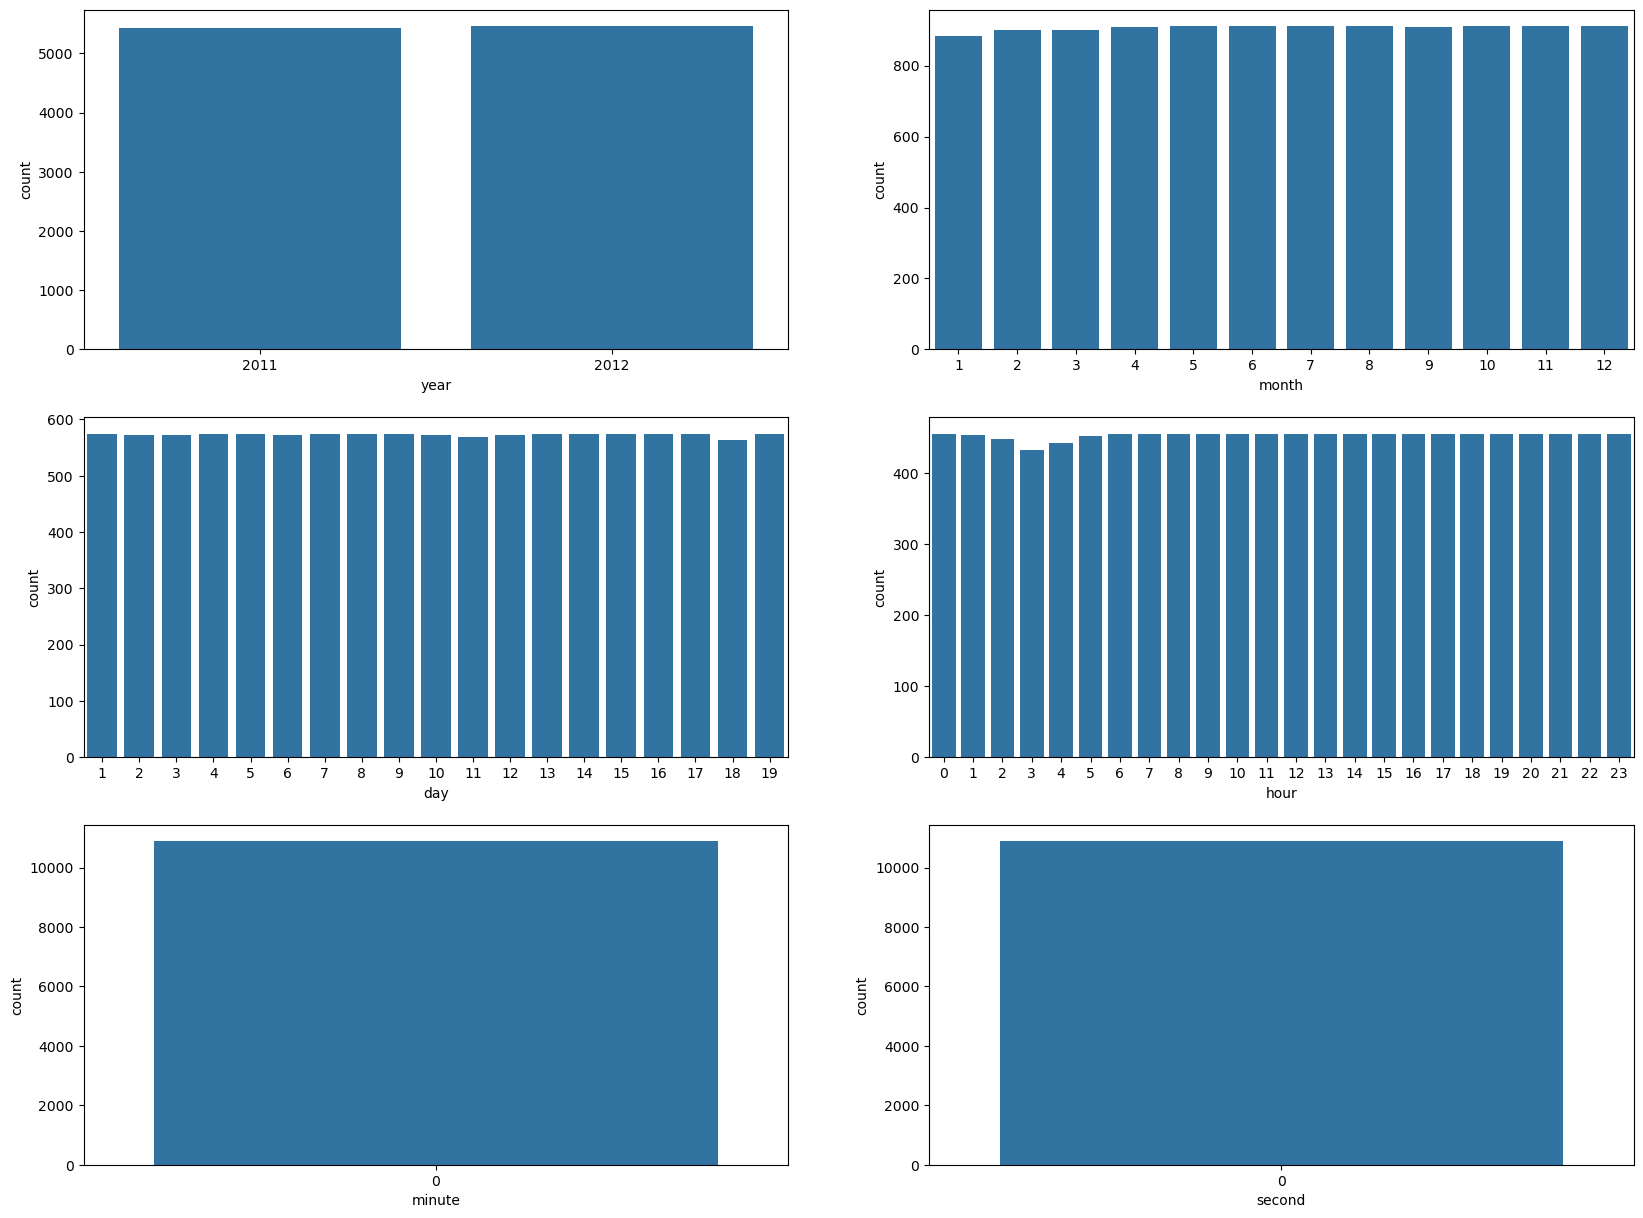

In [110]:
# data visualization
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

sns.countplot(ax=axes[0,0], data=bike_sharing, x='year')
sns.countplot(ax=axes[0,1], data=bike_sharing, x='month')
sns.countplot(ax=axes[1,0], data=bike_sharing, x='day')
sns.countplot(ax=axes[1,1], data=bike_sharing, x='hour')
sns.countplot(ax=axes[2,0], data=bike_sharing, x='minute')
sns.countplot(ax=axes[2,1], data=bike_sharing, x='second')

In [111]:
# drop unnecessary columns
bike_sharing.drop(['datetime', 'minute', 'second', 'casual', 'registered'], axis=1, inplace=True)

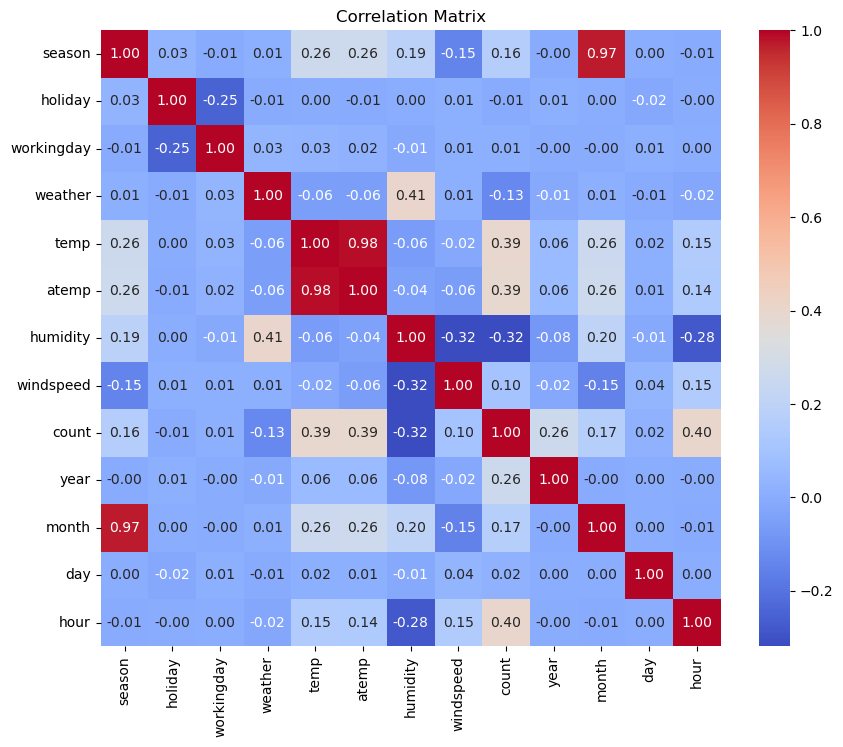

In [112]:
# Calculate the correlation matrix
corr_matrix = bike_sharing.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [113]:
# drop columns that have low correlation with count
bike_sharing.drop(['day', 'holiday', 'workingday'], axis=1, inplace=True)
bike_sharing.head()

,season,weather,temp,atemp,humidity,windspeed,count,year,month,hour
0,1,1,9.84,14.395,81,0.0,16,2011,1,0
1,1,1,9.02,13.635,80,0.0,40,2011,1,1
2,1,1,9.02,13.635,80,0.0,32,2011,1,2
3,1,1,9.84,14.395,75,0.0,13,2011,1,3
4,1,1,9.84,14.395,75,0.0,1,2011,1,4


In [114]:
features = ['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour']

X = bike_sharing[features].values
y = bike_sharing['count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8708, 9) (2178, 9) (8708,) (2178,)


In [115]:
# initialize the model
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

# predict the test set with test set
y_pred = model.predict(X_test)

# calculate the MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 19951.727504723433
Root Mean Squared Error: 141.25058408630895


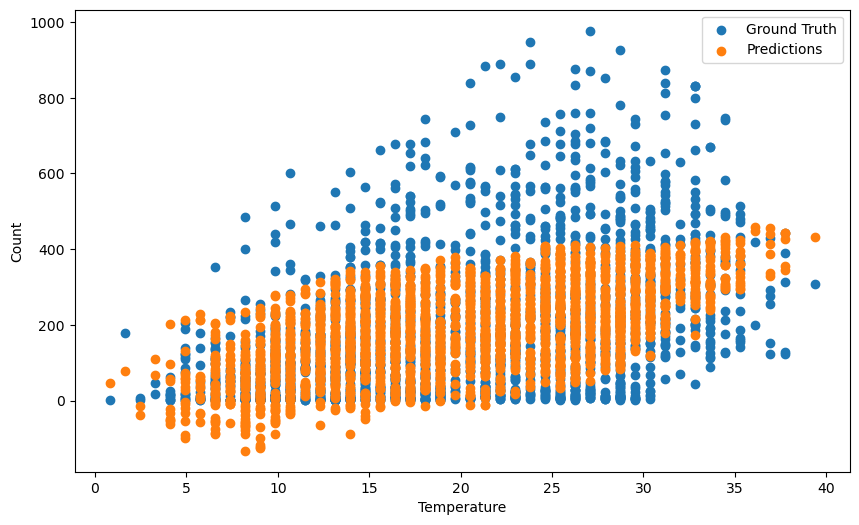

In [121]:
# plot the predicted values with temperature
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 2], y_test, label='Ground Truth')
plt.scatter(X_test[:, 2], y_pred, label='Predictions')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()
plt.show()

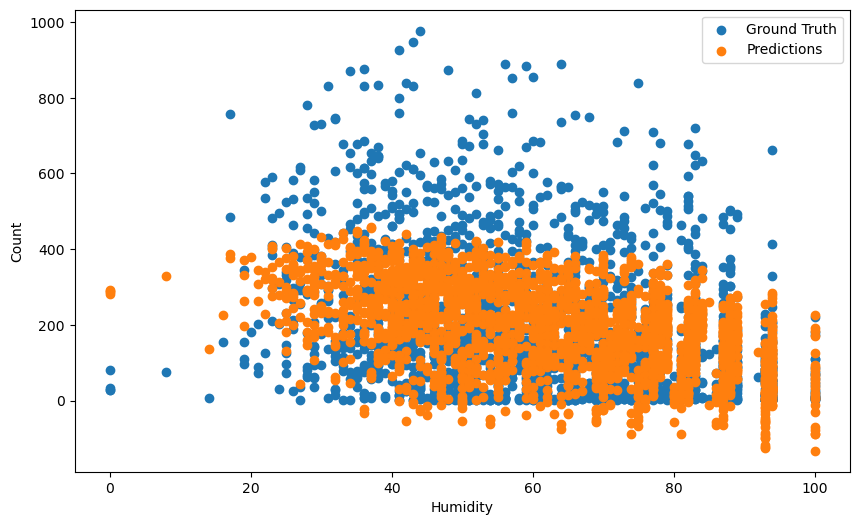

In [122]:
# plot the predicted values with humidity
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 4], y_test, label='Ground Truth')
plt.scatter(X_test[:, 4], y_pred, label='Predictions')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()
plt.show()